In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Load data

In [42]:
data = pd.read_csv("./epoch_training_time.csv")

In [43]:
# Get the three series, dense, venom and venom with no transposition

dense = data[data['name'] == 'dense'].groupby(['bs'])["mean"].mean().reset_index(name="step_time_mean")
venom = data[data['name'] == 'venom'].groupby(['bs'])["mean"].mean().reset_index(name="step_time_mean")
venom_no_transpose = data[data['name'] == 'venom_no_transpose'].groupby(['bs'])["mean"].mean().reset_index(name="step_time_mean")
batch_sizes = data['bs'].sort_values( ascending=True).unique()

#print('batch sizes:', batch_sizes)
#print('Dense times:', dense)
#print('VENOM times:\n', venom)
#print('VENOM no transpose times:\n', venom_no_transpose)


# Create a DataFrame
df = pd.DataFrame({
    'Batch Size': batch_sizes,
    'Dense': dense['step_time_mean'],
    'VENOM': venom['step_time_mean'],
    'VENOM w/o transpose': venom_no_transpose['step_time_mean']
}).set_index('Batch Size')



Text(0.5, 1.0, 'Average epoch time of the 4 GPUs')

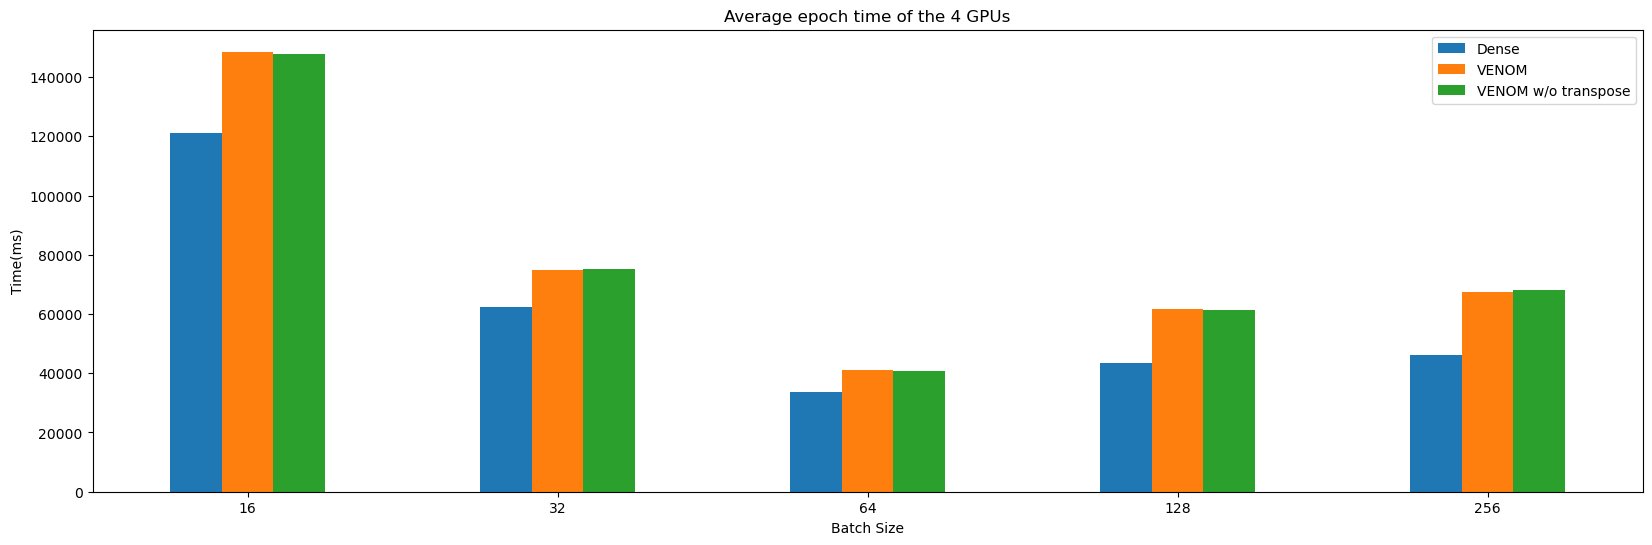

In [44]:
# Draw graph.
#fig, ax = plt.subplots(figsize=(20, 6))
ax = df.plot(kind='bar', rot=0, figsize=(20, 6))

#tick_location = range(1, 6)

# plot series
#ax.plot(dense, batch_sizes, color='r', label='Dense kernels')
#dense_bars = ax.bar(tick_location, dense['step_time_mean'], label='Dense kernels')
#dense_bars = ax.bar(tick_location, venom['step_time_mean'], label='VENOM kernels')
#dense_bars = ax.bar(tick_location, venom_no_transpose['step_time_mean'], label='VENOM w/o Transpose kernels')
#ax.plot(venom, batch_sizes, color='g', label='VENOM kernels')
#ax.plot(venom_no_transpose, batch_sizes, color='b', label='VENOM kernels w/o transpose')



# Decorate graph
ax.set_ylabel('Time(ms)')
#ax.set_xlabel('Batch size')
ax.set_title('Average epoch time of the 4 GPUs')
#ax.set_xticks(tick_location, dense['bs'])
#ax.legend(loc='upper right')